In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.5 MB/s eta 0:00:00


In [2]:
# UTILITIES
import numpy as np
import matplotlib.pyplot as plt
import gc

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    del mask
    gc.collect()

def show_masks_on_image(raw_image, masks):
  plt.imshow(np.array(raw_image))
  ax = plt.gca()
  ax.set_autoscale_on(False)
  for mask in masks:
      show_mask(mask, ax=ax, random_color=True)
  plt.axis("off")
  plt.show()
  del mask
  gc.collect()

In [3]:
#LOAD MODEL


from transformers import pipeline
generator = pipeline("mask-generation", model="facebook/sam-vit-huge", device=0)

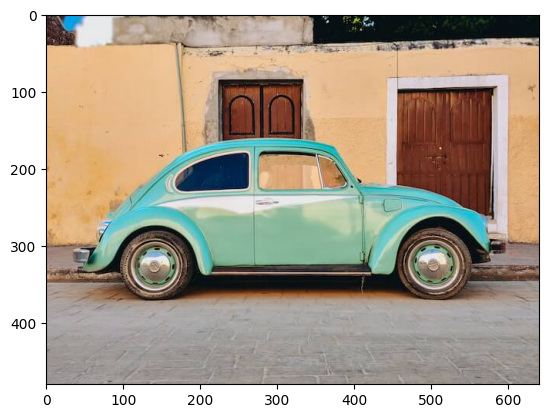

In [5]:
#LOAD EXAMPLE IMAGE

from PIL import Image
import requests

img_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

plt.imshow(raw_image)

In [10]:
#MASK GENERATION


outputs = generator(raw_image, points_per_batch=64)

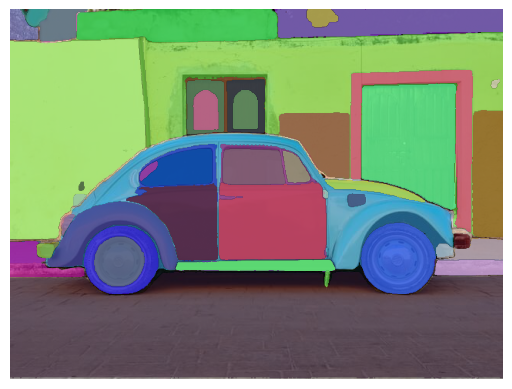

In [11]:
#GENERATE SEGMENTATION MASKS

masks = outputs["masks"]
show_masks_on_image(raw_image, masks)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:646: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x7fb0c9cf1910> was reported to be 2 (when accessing len(dataloader)), but 3 samples have been fetched. 
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:646: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x7fb0c9cf1910> was reported to be 2 (when accessing len(dataloader)), but 4 samples have been fetched. 
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:646: UserWarning: Length of IterableDataset <transformers.pipelines.pt_utils.PipelineChunkIterator object at 0x7fb0c9cf1910> was reported to be 2 (when accessing len(dataloader)), but 5 samples have been fetched. 
  warnings.warn(warn_msg)
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:

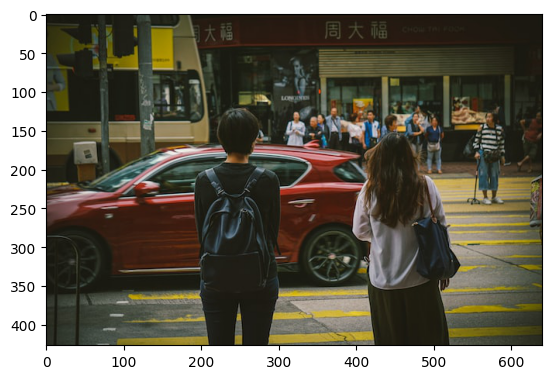

In [12]:
# TEST ON BATCH OF IMAGES

new_image_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/depth-estimation-example.jpg"

raw_image_b = Image.open(requests.get(new_image_url, stream=True).raw).convert("RGB")

plt.imshow(raw_image_b)

#MASK GENERATION
outputs_b = generator([raw_image_b,new_image_url], points_per_batch=64)

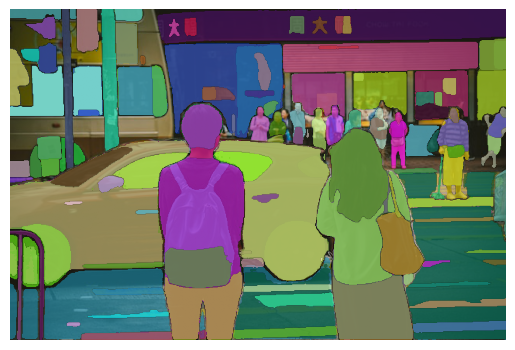

In [13]:
masks_b = outputs_b[1]["masks"]
show_masks_on_image(raw_image_b, masks_b)